Problem Statement :- Give the different features with their measurements we have to detect that either the patient is Malignant(person is having breast cancer) or Benign(person is not having breast cancer)

Importing the dataset from sklearn dataset module

In [1]:
from sklearn.datasets import load_breast_cancer

creating the object of dataset and storing it in breast_cancer variable, intially the dataset is in Dictionary format

In [2]:
breast_cancer = load_breast_cancer()

Printing the feature names and how many features are present in the dataset

In [3]:
print(breast_cancer.feature_names)
print()
print(len(breast_cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

30


Importing the Libraries which are required for the project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Printing the target column here 0 means Malignant(person is having breast cancer) and 1 means benign(not having breast cancer)

In [5]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Printing the target columns names

In [6]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Checking how many Malignant and Benign patients are there.

In [7]:
print(np.array(np.unique(breast_cancer.target, return_counts = True)))

[[  0   1]
 [212 357]]


Creating a histogram to check is any row is corelated or not.

<function matplotlib.pyplot.show(close=None, block=None)>

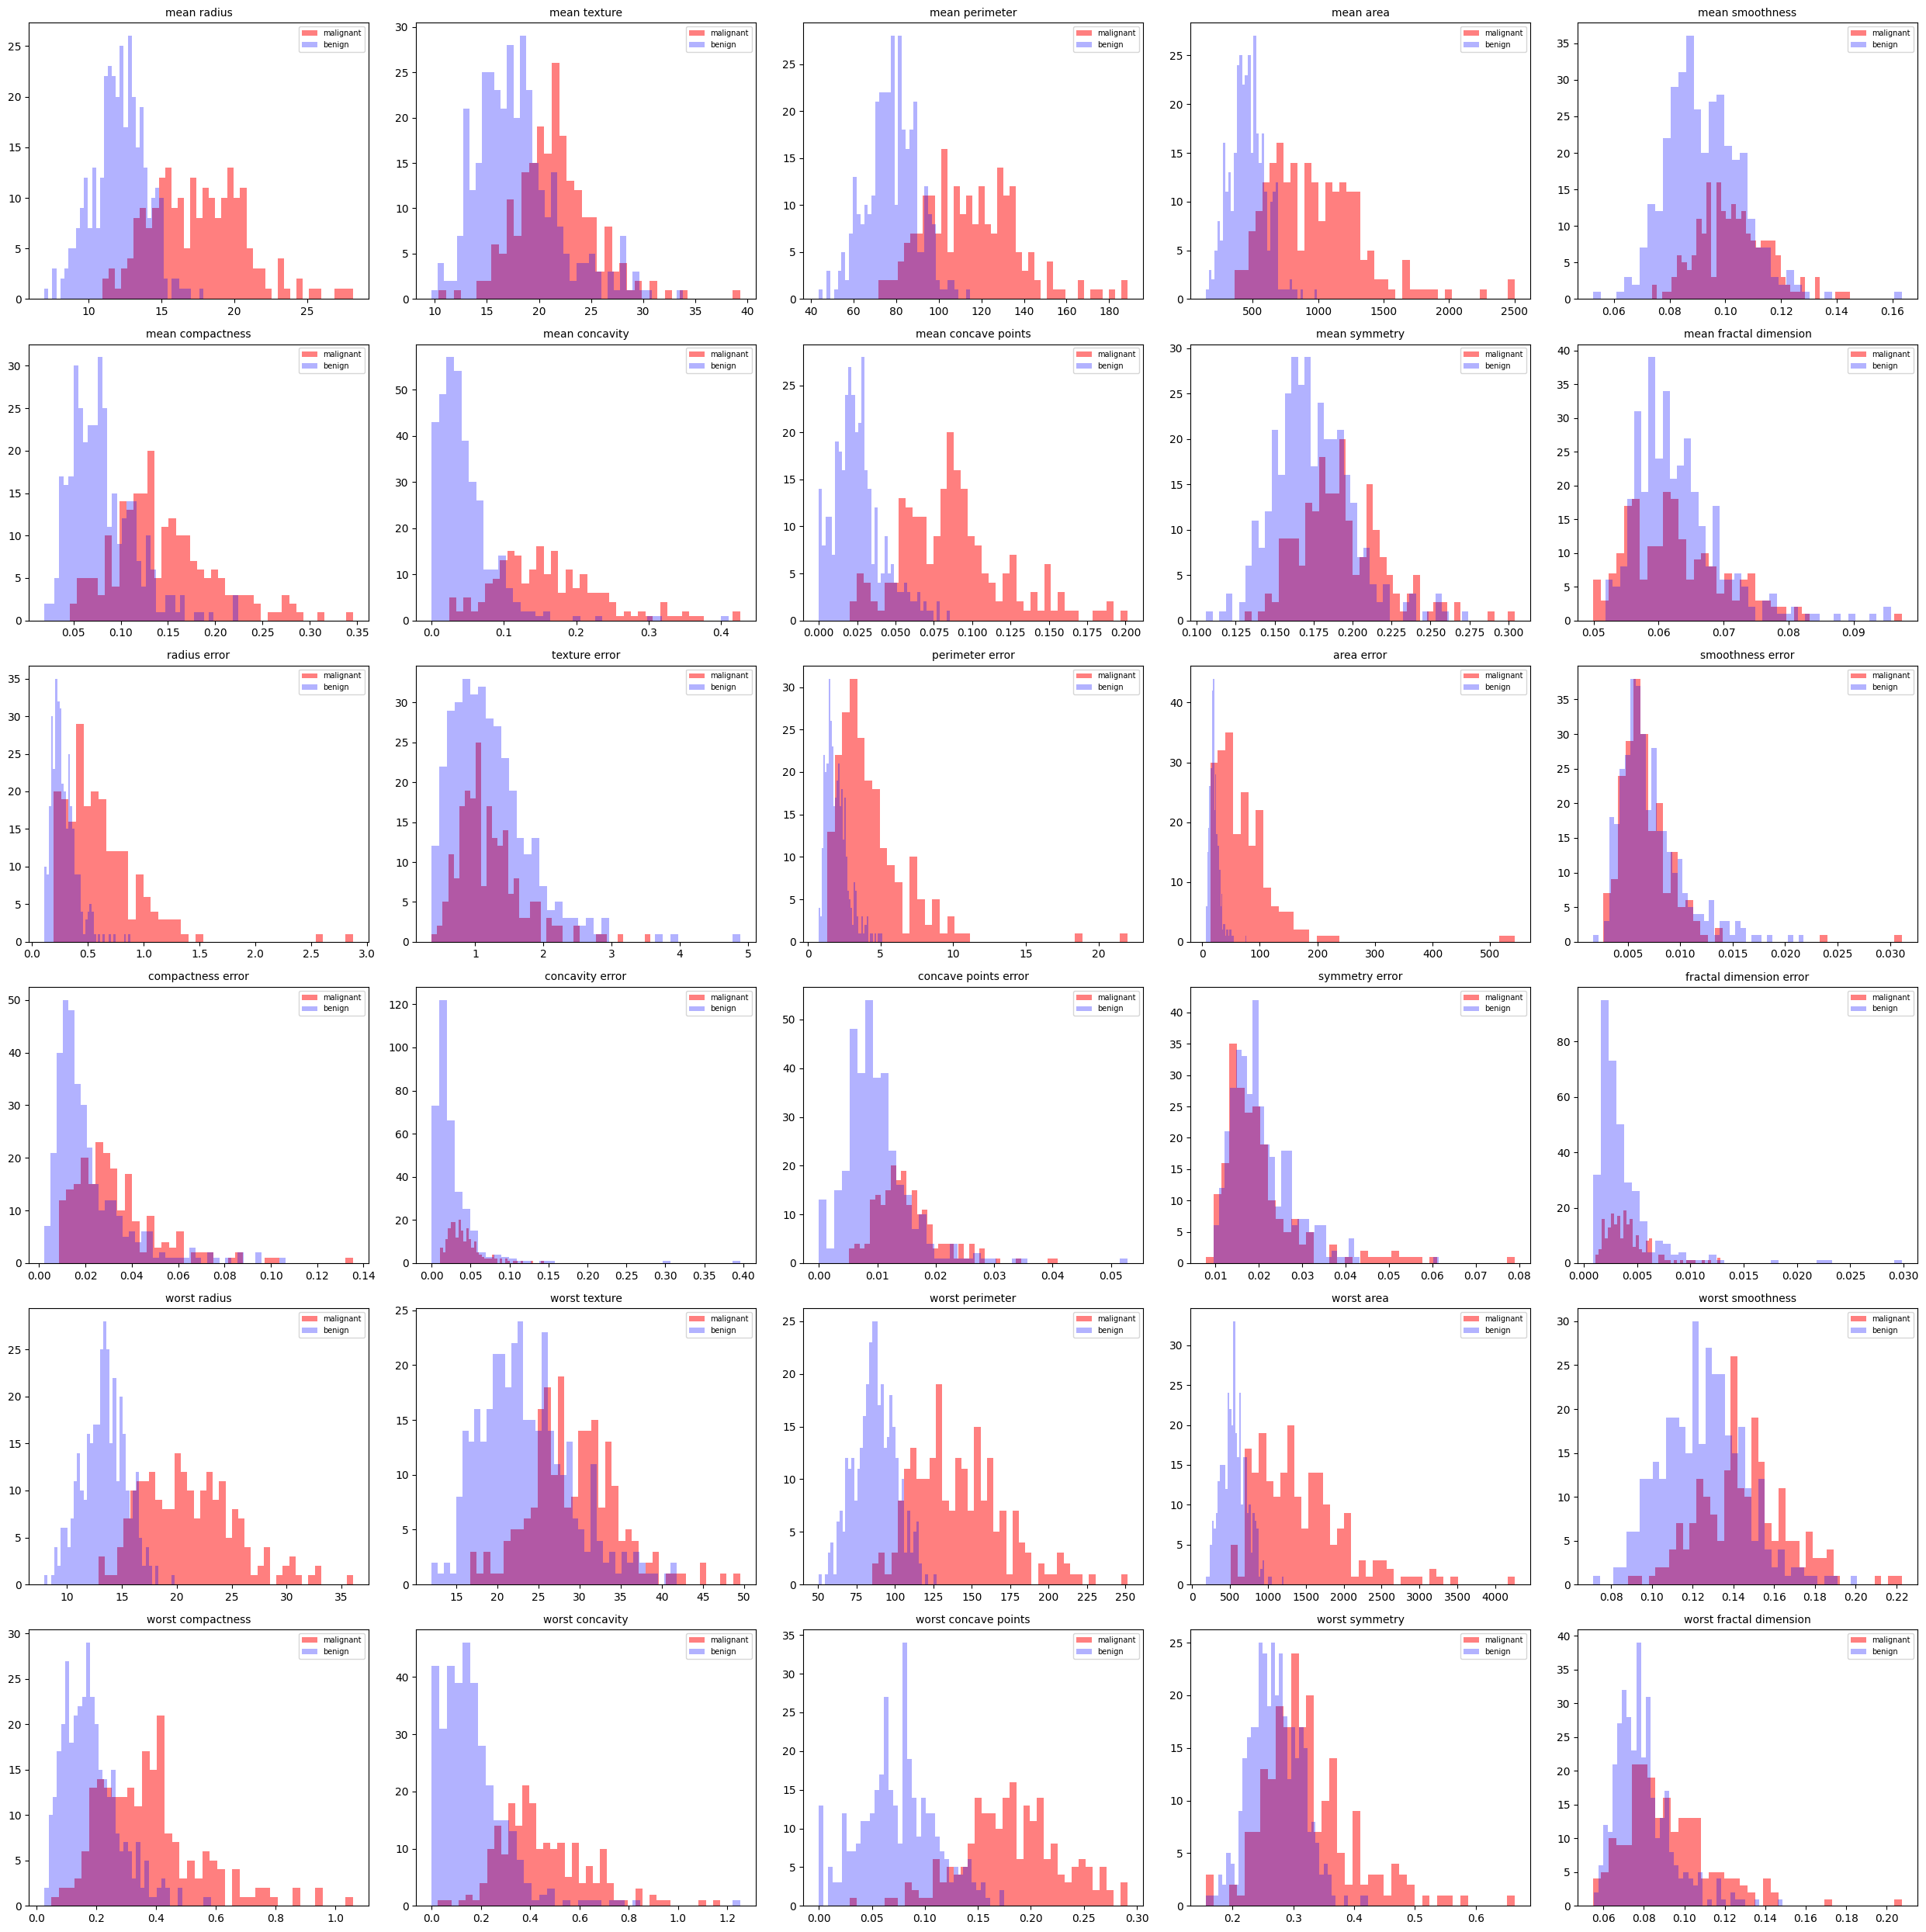

In [8]:
fig, axes = plt.subplots(6,5, figsize=(25, 25))
malignant = breast_cancer.data[breast_cancer.target == 0]
benign = breast_cancer.data[breast_cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    bins = 40
    ax[i].hist(malignant[:, i], bins = bins, color='r', alpha=0.5)
    ax[i].hist(benign[:, i], bins = bins, color='b', alpha=0.3)
    ax[i].set_title(breast_cancer.feature_names[i], fontsize = 10)
    ax[i].legend(['malignant', 'benign'], loc='best', fontsize = 7)

plt.tight_layout()
plt.show

Converting the dataset to dataframe because initially the dataset was in dictionary format

In [9]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

The initially Dictionary does not contain the target column so adding the target column and naming it as diagnosis

In [10]:
data['diagnosis'] = breast_cancer.target

Printing the dataset and checking the data is consistent or not

In [11]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


So now selecting the independent column and dependent column for building the model

In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

As y was not in proper shape so reshaping it

In [13]:
y = y.reshape(y.shape[0], 1)

Splitting the dataset into training data and testing data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=1)

Builing a simple logistic Regresion model, training the model using training dataset and checking the model score

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9473684210526315

# Performing VIF

Checking for the eatures which are corelated to the diagnosis feature and sorting it in descending oreder

In [16]:
df_corr = data.corr()['diagnosis'].abs().sort_values(ascending=False)
df_corr

diagnosis                  1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

Selecting the features which are having corelation above 0.6

In [17]:
features = df_corr[df_corr>0.6].index.to_list()[1:]
features

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

Calculating the Vif score and tolerance for each feature and vif score is consider good if the vif score is below 5.

In [18]:
def vif_func(df, features):
    vif, tolerance = {}, {}
    for feature in features:
        x = [f for f in features if f != feature]
        X = df[x]
        y = df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)
        tolerance[feature] = 1-r2
        vif[feature] = 1/tolerance[feature]

    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [19]:
vif_func(data, features)

,VIF,Tolerance
worst concave points,17.130560,0.058375
worst perimeter,204.329679,0.004894
mean concave points,34.546872,0.028946
worst radius,391.471018,0.002554
mean perimeter,1519.882563,0.000658
worst area,169.931222,0.005885
mean radius,1606.575820,0.000622
mean area,200.004550,0.005000
mean concavity,30.806430,0.032461
worst concavity,14.417687,0.069359


So mean radius is having very high value so removing the mean radius and again checking vif of selected features

In [20]:
features.remove('mean radius')
vif_func(data, features)

,VIF,Tolerance
worst concave points,17.090463,0.058512
worst perimeter,140.483526,0.007118
mean concave points,32.544706,0.030727
worst radius,220.680100,0.004531
mean perimeter,230.518857,0.004338
worst area,148.998839,0.006711
mean area,168.703866,0.005928
mean concavity,28.565739,0.035007
worst concavity,14.396219,0.069463


So mean perimeter is having very high value so removing the mean perimeter and again checking vif of selected features

In [21]:
features.remove('mean perimeter')
vif_func(data, features)

,VIF,Tolerance
worst concave points,17.047109,0.058661
worst perimeter,121.681010,0.008218
mean concave points,32.328825,0.030932
worst radius,145.465321,0.006874
worst area,36.850670,0.027137
mean area,20.141456,0.049649
mean concavity,28.430849,0.035173
worst concavity,14.388456,0.069500


So worst radius is having very high value so removing the worst radius and again checking vif of selected features

In [22]:
features.remove('worst radius')
vif_func(data, features)

,VIF,Tolerance
worst concave points,16.985904,0.058872
worst perimeter,46.921554,0.021312
mean concave points,32.070648,0.031181
worst area,29.254807,0.034182
mean area,19.314561,0.051774
mean concavity,26.442946,0.037817
worst concavity,14.318106,0.069842


So mean concave points is having very high value so removing the mean concave points and again checking vif of selected features

In [23]:
features.remove('mean concave points')
vif_func(data, features)

,VIF,Tolerance
worst concave points,8.284497,0.120707
worst perimeter,46.465197,0.021521
worst area,29.112795,0.034349
mean area,18.935262,0.052812
mean concavity,7.602036,0.131544
worst concavity,7.408181,0.134986


In [24]:
features.remove('worst perimeter')
vif_func(data, features)

,VIF,Tolerance
worst concave points,6.648486,0.150410
worst area,14.207913,0.070383
mean area,14.703955,0.068009
mean concavity,7.290916,0.137157
worst concavity,7.194848,0.138988


In [25]:
features.remove('worst area')
vif_func(data, features)

,VIF,Tolerance
worst concave points,6.347537,0.157541
mean area,2.825641,0.353902
mean concavity,6.976043,0.143348
worst concavity,7.099907,0.140847


Now selecting the independent features and the dependent features for the model after selecting the features which are corelated to the diagnosis feature and having less vif

In [26]:
X = data.loc[:, features]
y = data.loc[:, 'diagnosis']

Splitting the dataset into training data and testing data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=1)

Building the Logistic Regression Model and evaluting the model score

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8830409356725146

# PCA

After performing vif we have seen that model score is not that good so there are chances of muilticolinearity present in the data so we are using PCA

Selecting the independent feature and dependent feature

In [29]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

Before performing pca we have scale our data so using StandardScaler to scale the dataset

In [30]:
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

Intitally passing components as None because we doesn't know how many features are required for the model

In [31]:
components = None
pca = PCA(n_components=components)

Now fitting our scaled data in our pca model

In [32]:
pca.fit(x_scaled)

PCA()

Checking the varience explained by each feature

In [33]:
print("Varance Explained (in percent) ")
print(pca.explained_variance_ratio_*100)

Varance Explained (in percent) 
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]


Doing the cumulative sum of the features and printing them

In [34]:
print("Cumulative variance (in percent) ")
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative variance (in percent) 
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


Using the graph we are checking how mnay features are required for the final model

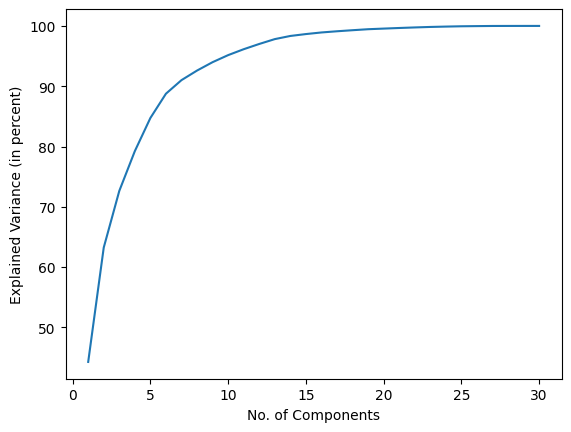

In [35]:
components = len(pca.explained_variance_ratio_*100)
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance (in percent)')
plt.show()

So now we are passing the components as 85% of variance explained by the feature so selecting those features which are explaining 85% variance

In [36]:
pca = PCA(n_components=0.85)
pca.fit(x_scaled)
print("Cumulative variance (in percent) ")
print(pca.explained_variance_ratio_.cumsum()*100)
components = len(pca.explained_variance_ratio_.cumsum())

Cumulative variance (in percent) 
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]


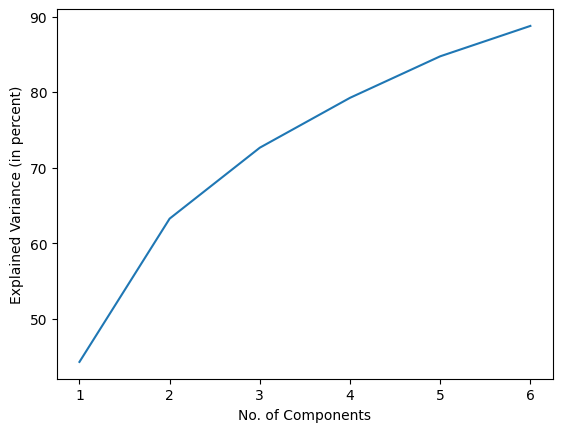

In [37]:
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance (in percent)')
plt.show()

Checking the shape of the components selected

In [38]:
pca_components = abs(pca.components_)
pca_components.shape

(6, 30)

So finallty 6 principal components are selected so checking the most important feature of selected principal components

In [39]:
print("the most important features in each principal components")
print("========================================================")
for row in range(pca_components.shape[0]):
    # get the indices of the top 5 features in each principal component
    temp = np.argpartition(-(pca_components[row]), 5)
    # sort the indices in desc order
    indices = temp[np.argsort((-pca_components[row])[temp])][:5]
    # print the names of the corresponding features
    print(f'Components {row}: {data.columns[indices].to_list()}')

the most important features in each principal components
Components 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness', 'worst perimeter']
Components 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius', 'compactness error']
Components 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry', 'radius error']
Components 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness', 'area error']
Components 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry', 'compactness error']
Components 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry', 'smoothness error']


Transform the data according to the pca model and printing the data

In [40]:
x_pca = pca.transform(x_scaled)
x_pca, x_pca.shape

(array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
          1.41142445],
        [ 2.3878018 , -3.76817174, -0.52929269,  1.11826386,  0.62177498,
          0.02865635],
        [ 5.73389628, -1.0751738 , -0.55174759,  0.91208267, -0.1770859 ,
          0.54145215],
        ...,
        [ 1.25617928, -1.90229671,  0.56273053, -2.08922702,  1.80999133,
         -0.53444719],
        [10.37479406,  1.67201011, -1.87702933, -2.35603113, -0.03374193,
          0.56793647],
        [-5.4752433 , -0.67063679,  1.49044308, -2.29915714, -0.18470331,
          1.61783736]]),
 (569, 6))

Spliiting the data into trainig data and testing data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, shuffle = True, random_state=1)

Now building the final model after pca to check the model score

In [42]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9590643274853801

So model score has increased, so there was multicolinearity present in the dataset